In [30]:
# Progetto di Base dei Dati
## Costa Giulia
## matricola n. 308558
## Previsioni sull'abbandono degli studenti
# Link Dataset: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
###Specifica di progetto\n Lo scopo principale del progetto è quello di creare un modello di classificazione che sia in grado di riconoscere l'abbandono o il successo degli studenti durante il loro anno accademico.\n Per fare ciò è stato analizzato un set di dati creato da un istituto di istruzione superiore relativo agli studenti iscritti a diversi corsi di laurea.\n
###Descrizione del dataset\n Il set di dati include informazioni note al momento dell'iscrizione degli studenti: percorso accademico, dati demografici e fattori socio-economici.\n E' inoltre riportato il rendimento accademico degli studenti alla fine del primo e del secondo semestre.\n Ogni istanza è rappresentata da uno studente.\n
###Descrizione dei file\n Il dataset è stato elaborato in 3 step:\n 1. divisione casuale in due set di dati, dove il 70% è stato usato per generare i dati di addestramento e il 30% per i dati di test.\n 2. Il set di dati di addestramento è stato ulteriormente suddiviso tramite tecnica di CROSS-VALIDATION, in modo da garantire una valutazione più accuarata del modello.\n 3. Il set di dati di addestramento è stato utilizzato per ricercare il modello migliore e i parametri migliori per addestrare il modello tramite la tecnica di GRIDSEARCHCV.

In [31]:
# librerie utilizzate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn import svm
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [32]:
# import dei dati
dataframe = pd.read_csv('data.csv', sep = ';')

print('I valori del dataset acquisito sono i seguenti: ', dataframe.shape)

I valori del dataset acquisito sono i seguenti:  (4424, 37)


Target:


[Text(0, 0, '1421'), Text(0, 0, '2209'), Text(0, 0, '794')]

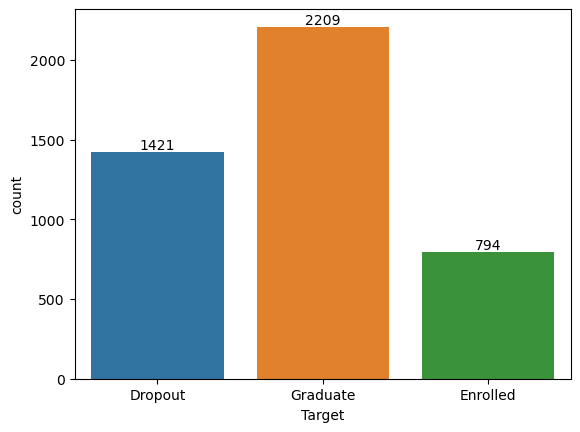

In [33]:
# Il Target equivale all'appartenenza di una delle 3 classi (dropout, enrolled, graduate)
print("Target:")
ax = sns.countplot(x=dataframe['Target'], data=dataframe)
ax.bar_label(ax.containers[0])

In [34]:
# Dal momento che mi interessano solo i dropout, vado a ridefinire il target come appartenenza a 2 classi 1 = dropout, 0 = Not dropout)
# Normalizzazione (pulizia dei dati)
# 1. trasformo dati stringa in numerici
dataframe = dataframe.replace("Dropout", 0).replace("Graduate", 1).replace("Enrolled", 1)

Grafico che rappresenta con il valore 0 il numero di studenti che hanno ababndonato gli studi, mentre con 1 il numero degli studenti che hanno terminato gli studi.


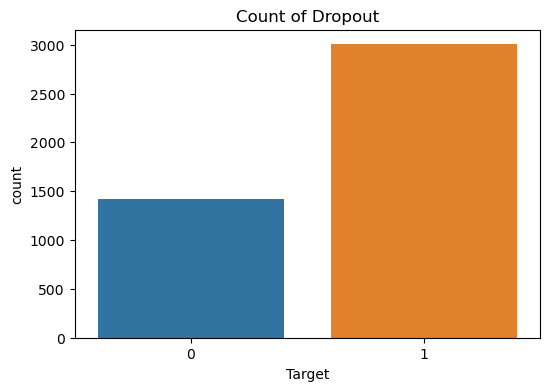

In [35]:
# Grafico di Dropout
fix = plt.subplots(figsize=(6,4))
sns.countplot(x=dataframe['Target'], data=dataframe)
plt.title("Count of Dropout")
print("Grafico che rappresenta con il valore 0 il numero di studenti che hanno ababndonato gli studi, mentre con 1 il numero degli studenti che hanno terminato gli studi.")
plt.show()

<Axes: xlabel='Previous qualification (grade)', ylabel='Count'>

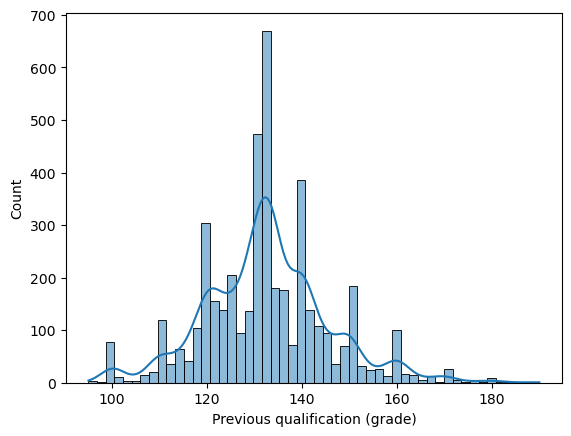

In [36]:
sns.histplot(x=dataframe["Previous qualification (grade)"], data=dataframe, kde = True)

In [37]:
#Percentuali Dropout
n=len(dataframe)
dropout_0=len(dataframe[dataframe['Target']==0])
dropout_1=len(dataframe[dataframe['Target']==1])

print("Droupout: ",dropout_1*100/n, "%")
print("Not Droupout: ",dropout_0*100/n, "%")

Droupout:  67.87974683544304 %
Not Droupout:  32.120253164556964 %


In [38]:
#Verifica se ci sono NaN (altro metodo usato per valori null)
#dataframe.isnull()
#print(dataframe.isnull().sum())

# elenco % di dati mancanti in ogni colonna
print('Dati:')
for col in dataframe.columns:
    pct_missing = np.mean(dataframe[col].isnull())   
    pct_zero = pct_missing
    pct_zero += pct_zero
    if pct_zero != 0:
        print('{} - {}%'.format(col, round(pct_missing*100)))
print("Non sono presenti dati nulli.")

Dati:
Non sono presenti dati nulli.


In [39]:
#Verifica se ci sono duplicati
dataframe[dataframe.duplicated()]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


In [40]:
duplicate_count = len(dataframe)-len(dataframe.drop_duplicates())
print("DUPLICATI: ", duplicate_count)

DUPLICATI:  0


In [41]:
#-------------------------------------------------------------------------------------------------------------------
# suddivido la tabella in due (data, target)
#-------------------------------------------------------------------------------------------------------------------
X = dataframe.drop(columns=['Target'])
y = dataframe['Target']

In [42]:
#-------------------------------------------------------------------------------------------------------------------
#Divido i dati X, y in training and test, selezionando casualmente i dati per l'allenamento
#-------------------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

print(f'X: {X.shape}\nX_train: {X_train.shape}\nX_test: {X_test.shape}')

X: (4424, 36)
X_train: (3096, 36)
X_test: (1328, 36)


In [43]:
#-----------------------------------------------------------------------------------------------------
#GENERAZIONE DEI MODELLI e CONFRONTO per capire quale mi permette di avere delle performance migliori
#-----------------------------------------------------------------------------------------------------

In [44]:
#Lista dei modelli
#1. LogisticRegression
#Modello statistico usato per problemi di classificazione e analisi di predittività.
#Calcola la probabilità che un'istanza appartenga a una delle due classi utilizzando la funzione logistica per mappare l'output lineare a una probabilità compresa tra 0 e 1.
#'max-iter' specificare il numero massimo di iterazioni (epoche) che l'algoritmo deve eseguire per ottimizzare i pesi del modello.

#2. SVC: "Support Vector Classification"
#Divide i dati in base alle 2 classi definite, cercando il miglior iperpiano (confine che esiste tra i 2).
#Perchè utilizzarlo: offre una buona precisione ed esegue previsioni più veloci rispetto all'algoritmo Naïve Bayes.
#Usa anche meno memoria perché usa un sottoinsieme di punti di allenamento nella fase decisionale.
#La sua funzione principale è trovare il miglior iperpiano per separare le classi di dati: in questo caso viene utilizzato un kernel lineare. 

#3. RandomForest (MIGLIORE)
#Algoritmo che si basa su una tecnica che si chiama 'bagging'  e combina diversi alberi decisionali per migliorare le prestazioni del modello.
#Si occupa della creazione di alberi decisionali ognuno dei quali è un classificatore. Ogni albero viene addestrato su un sottoinsieme casuale dei dati di addestramento e delle caratteristiche del dataset.
#Questo significa che ogni albero può vedere solo una parte dei dati, il che aiuta a ridurre il rischio di overfitting (sovradattamento) e aumenta la diversità tra gli alberi.

# Creazione degli istanze dei modelli con il supporto per la probabilità abilitato
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('SVC (Linear Kernel)', SVC(kernel='linear', probability=True)),
    ('Random Forest', RandomForestClassifier(n_estimators=40))
]
print("MODELLI:\n 1. LOGISTIC REGRESSION\n 2. SVC\n 3. RANDOM FOREST")


MODELLI:
 1. LOGISTIC REGRESSION
 2. SVC
 3. RANDOM FOREST


In [45]:
# Crea una lista vuota di DataFrame
dfs_base = []

#Funzione per mettere a confronto i modelli
def compare_models_train_test(dfs_base):
    precision = 0.0
    recall = 0.0
    f1_score = 0.0  
    
    for model_name, model in models:
        
        # Addestramento del modello sui dati di addestramento
        model.fit(X_train, y_train)
        # Predizioni sul set di test
        prediction = model.predict(X_test)
        
        # Calcolo delle metriche
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        recall = recall_score(y_test, prediction)
        
        # Report di classificazione
        report=classification_report(y_test, prediction)
        
        # Stampa delle metriche e del report
        print("REPORT DEL MODELLO ", model_name.upper(), ":")
        print(f'Accuracy (Test Set): {accuracy:.4f}')
        print(report)
       
        df_base = pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall]})
        dfs_base.append(df_base)
    
        confusion_matrix = metrics.confusion_matrix(y_test, prediction)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
        cm_display.plot()
        print("Errori: \n", confusion_matrix)
        plt.show()

In [46]:
#modello LogicalRegression:
#Notiamo che la precisione della classe 0 è 0.86, mentre del 0.87 per la classe 1. Questi valori indicano che il modello è migliore nel predire la classe 1 rispetto alla classe 0.
#La matrice di confusione mostra il numero di predizioni corrette (valori sulla diagonale principale) e il numero di errori di classificazione per ciascuna classe. Per esempio, il modello ha classificato correttamente 281 campioni della classe 0 e 873 campioni della classe 1, ma ha commesso 127 errori di classificazione nella classe 0 e 47 errori di classificazione nella classe 1.
#In generale, questo report suggerisce che il modello di regressione logistica ha ottenuto buone prestazioni con un'accuratezza del 86,90% e buoni valori di precisione, recall e F1-score, soprattutto per la classe 1. Tuttavia, sembra che il modello possa migliorare nella previsione della classe 0, poiché ha un recall più basso per questa classe. 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Modello SVC(linear kernel)
#La matrice di confusione determina che il modello ha classificato correttamente 277 campioni della classe 0 e 876 campioni della classe 1, ma ha commesso 131 errori di classificazione nella classe 0 e 44 errori di classificazione nella classe 1.
#Dati i valori presentati nel report il modello ha ottenuto una buona accuratezza nel prevedere le classi target.
#Anche se il recall, che misura la frazione di campioni positivi correttamente predetti rispetto a tutti i campioni effettivamente positivi, per la classe 0 è del 68%. 
#Questo significa che solo il 68% di tutti i campioni della classe 0 sono stati identificati correttamente dal modello.
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Modello Random Forest
#La matrice di confusione ci dice che il modello ha classificato correttamente 296 campioni della classe 0 e 881 campioni della classe 1, ma ha commesso 112 errori di classificazione nella classe 0 e 39 errori di classificazione nella classe 1.
#Dati i risultati riportati nel report, pare che questo modello sia il migliore per tutte le metriche di entrambe le classi

REPORT DEL MODELLO  LOGISTIC REGRESSION :
Accuracy (Test Set): 0.8690
              precision    recall  f1-score   support

           0       0.86      0.69      0.76       408
           1       0.87      0.95      0.91       920

    accuracy                           0.87      1328
   macro avg       0.86      0.82      0.84      1328
weighted avg       0.87      0.87      0.86      1328

Errori: 
 [[281 127]
 [ 47 873]]


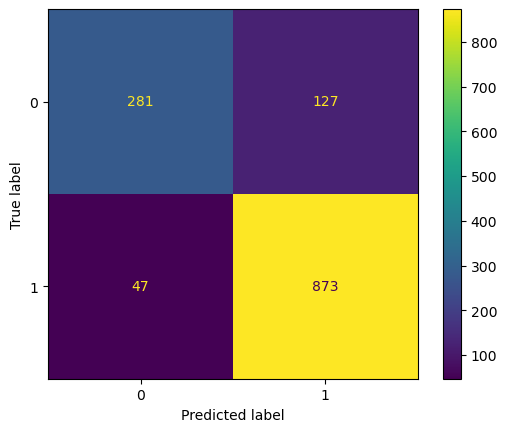

REPORT DEL MODELLO  SVC (LINEAR KERNEL) :
Accuracy (Test Set): 0.8682
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       408
           1       0.87      0.95      0.91       920

    accuracy                           0.87      1328
   macro avg       0.87      0.82      0.83      1328
weighted avg       0.87      0.87      0.86      1328

Errori: 
 [[277 131]
 [ 44 876]]


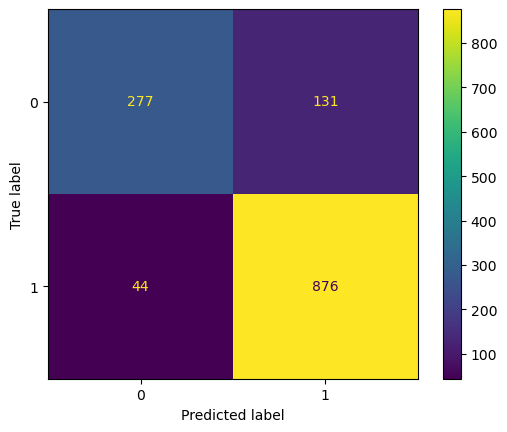

REPORT DEL MODELLO  RANDOM FOREST :
Accuracy (Test Set): 0.8863
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       408
           1       0.89      0.96      0.92       920

    accuracy                           0.89      1328
   macro avg       0.89      0.84      0.86      1328
weighted avg       0.89      0.89      0.88      1328

Errori: 
 [[296 112]
 [ 39 881]]


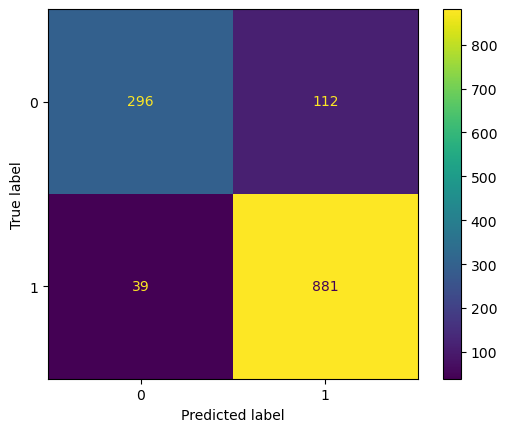

In [47]:
compare_models_train_test(dfs_base)

In [48]:
# Concatena i DataFrame
result_df = pd.concat(dfs_base, ignore_index=True)
#result_df.reset_index(drop=True, inplace=True)
# Stampa il DataFrame
print("VALUTAZIONE DELLE PRESTAZIONI BASE:")
print(result_df)

VALUTAZIONE DELLE PRESTAZIONI BASE:
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.868976   0.873000  0.948913
1  SVC (Linear Kernel)  0.868223   0.869911  0.952174
2        Random Forest  0.886295   0.887210  0.957609


In [49]:
result_accuracy = {}
result_precision = {}
result_recall = {}
result_f1 = {}

In [50]:
def parallel_cross_val_score_accuracy(model, X_train, y_train, cv):
    return cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

In [51]:
#----------------------------------------------------------------------------------------------------------
#------------------------------ CROSS VALIDATION: convalida incrociata ------------------------------------
#E' un metodo che aiuta a valutare le prestazioni di un modello in modo più affidabile rispetto 
#a una singola divisione dei dati in set di addestramento e set di test. 
#Invece di utilizzare solo una divisione dei dati, la cross-validation suddivide il dataset in più parti 
#(conosciute come fold) e addestra e valida il modello più volte, utilizzando diverse combinazioni di fold.
#----------------------------------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from joblib import Parallel, delayed

# Crea una lista vuota di DataFrame
dfs = []

# Eseguo una cross-validation per ciascun modello e calcolo le metriche
# Utilizzando la cross-validation sul set di addestramento si ottimizza ulteriormente il modello 
# permettendo una valutazione finale sul set di test, otimizzata.

#Funzione per mettere a confronto i modelli
def cross_validation_models():
    for model_name, model in models:
        
        # Numero di core o macchine da utilizzare per la parallelizzazione
        n_jobs = -1  # Utilizza tutti i core disponibili

        # Numero di fold per la cross-validation
        cv = 5

        # Esegui cross_val_score in parallelo
        results_accuracy = Parallel(n_jobs=n_jobs)(
            delayed(parallel_cross_val_score_accuracy)(model, X_train, y_train, cv) for _ in range(2)  # Esegui 2 volte
        )
        
        # Calcola la media delle accuracy ottenute in ogni iterazione
        accuracy_score_media = np.mean(results_accuracy)
        
        # Addestramento del modello sui dati di addestramento
        model.fit(X_train, y_train)
        # Predizioni sul set di test
        pred_cross = model.predict(X_test)
        
        # Calcolo delle metriche
        accuracy_cross = accuracy_score(y_test, pred_cross)
        precision_cross = precision_score(y_test, pred_cross)
        recall_cross = recall_score(y_test, pred_cross)
        
        # Report di classificazione
        report_cross = classification_report(y_test, pred_cross)
        
        # Stampa delle metriche e del report
        print("***********", model_name.upper(),"***********")
        print(f'Accuracy (Cross Validation): {accuracy_score_media:.4f}')
        print(f'Accuracy (Test Set): {accuracy_cross:.4f}')
        print('---------------------------------------------------')
        print("REPORT DEL MODELLO (Test Set):")
        print(report_cross)
              
        # Creo un Dataframe nella quale inserire tutti i dati
        df = pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy_cross], 'Precision': [precision_cross], 'Recall': [recall_cross]})
        dfs.append(df)
    
        confusion_matrix = metrics.confusion_matrix(y_test, pred_cross)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
        cm_display.plot()
        print("Errori: \n", confusion_matrix)
        plt.show()

*********** LOGISTIC REGRESSION ***********
Accuracy (Cross Validation): 0.8743
Accuracy (Test Set): 0.8690
---------------------------------------------------
REPORT DEL MODELLO (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.69      0.76       408
           1       0.87      0.95      0.91       920

    accuracy                           0.87      1328
   macro avg       0.86      0.82      0.84      1328
weighted avg       0.87      0.87      0.86      1328

Errori: 
 [[281 127]
 [ 47 873]]


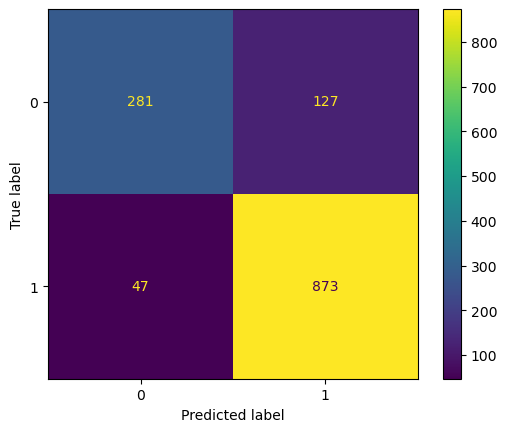

*********** SVC (LINEAR KERNEL) ***********
Accuracy (Cross Validation): 0.8605
Accuracy (Test Set): 0.8682
---------------------------------------------------
REPORT DEL MODELLO (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       408
           1       0.87      0.95      0.91       920

    accuracy                           0.87      1328
   macro avg       0.87      0.82      0.83      1328
weighted avg       0.87      0.87      0.86      1328

Errori: 
 [[277 131]
 [ 44 876]]


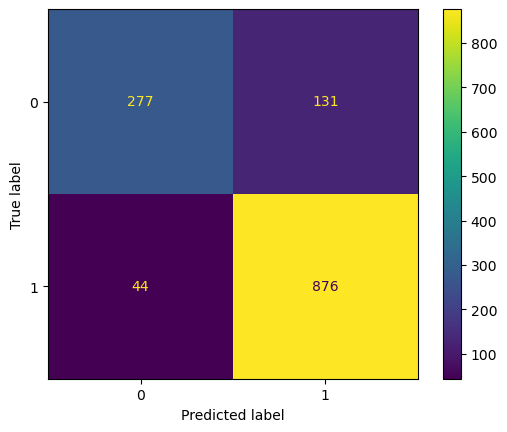

*********** RANDOM FOREST ***********
Accuracy (Cross Validation): 0.8606
Accuracy (Test Set): 0.8855
---------------------------------------------------
REPORT DEL MODELLO (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       408
           1       0.89      0.95      0.92       920

    accuracy                           0.89      1328
   macro avg       0.88      0.84      0.86      1328
weighted avg       0.88      0.89      0.88      1328

Errori: 
 [[298 110]
 [ 42 878]]


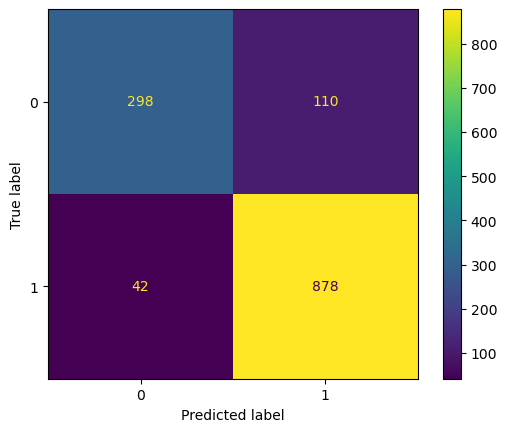

In [52]:
cross_validation_models()

In [ ]:
#Dopo l'utilizzo della tecnica di CROSS-VALIDATION per calcolare con più accuratezza la precisione dei modelli, notiamo che le performance indicativamente sono sempre le stesse, in quanto forse sarebbe necessario suddividere i dati in ulteriori folder, a discapito però delle prestazioni, aumentando i tempi di elaborazione. 

In [53]:
# Concatena i DataFrame
result_df_cross = pd.concat(dfs, ignore_index=True)
#result_df.reset_index(drop=True, inplace=True)
# Stampa il DataFrame
print("VALUTAZIONE DELLE PRESTAZIONI CON CROSS-VALIDATION")
print(result_df_cross)

VALUTAZIONE DELLE PRESTAZIONI CON CROSS-VALIDATION
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.868976   0.873000  0.948913
1  SVC (Linear Kernel)  0.868223   0.869911  0.952174
2        Random Forest  0.885542   0.888664  0.954348


In [54]:
#GRID SEARCH: metodo che mi permette trovare il modello migliore e mi dice qual è il parametro migliore per quel modello.

In [55]:
# Crea una lista vuota di DataFrame
dfs_grid = []

# Parametri per la regressione logistica
parametri_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Valori di regolarizzazione
}

# Parametri per il support vector machine con kernel lineare
parametri_svc_linear = {
    'C': [0.001, 0.05, 1, 10],  # Valori di regolarizzazione
    'degree' : [3, 5],          # Indica il grado del kernel polinomiale, controllando la complessità del modello
    'gamma' : ('auto','scale'), # Parametro di regolazione che controlla l'influenza dei singoli punti dati nella costruzione del modello SVM.
}

# Parametri per il random forest
parametri_random_forest = {
    'n_estimators': [5, 10, 40],  # Numero di alberi decisionali
    'max_depth': [None, 2, 8],         # Profondità massima degli alberi
    'max_features': [0.1, 0.6, 1.0],  # Numero di funzionalità da cansiderare ad ogni divisione
}

#Ridefinisco model per aggiungere un parametro per ciclare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000), parametri_logistic),
    ('SVC (Linear Kernel)', SVC(kernel='linear', probability=True), parametri_svc_linear),
    ('Random Forest', RandomForestClassifier(n_estimators=40), parametri_random_forest)
]

In [56]:
from sklearn.model_selection import GridSearchCV

risultati_grid_search = {}

for model_name, model, parametri in models:
    grid_search_accuracy = GridSearchCV(model, parametri, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy') # verbose: viene visualizzato un output sull'avanzamento del processo., n_jobs è il numero di core usati (-1 significa tutti i core/thread disponibili)
    grid_search_accuracy.fit(X_train, y_train)  # X_train e y_train sono i tuoi dati di addestramento

    # Estrai il miglior modello dalla ricerca della griglia
    best_model = grid_search_accuracy.best_estimator_
    
    # Addestra il modello con i migliori parametri
    best_model.fit(X_train, y_train)          
          
    y_pred = grid_search_accuracy.predict(X_test)
    
    # Calcola le metriche di valutazione
    accuracy_grid = accuracy_score(y_test, y_pred)
    precision_grid = precision_score(y_test, y_pred)
    recall_grid = recall_score(y_test, y_pred)
    
    # Stampa le metriche di valutazione
    print("Modello:", model_name)
    print("Migliori parametri:", grid_search_accuracy.best_params_)
    print("\nMetriche di valutazione:")
    print("Accuracy:", accuracy_grid)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n--------------------------------------\n")
    
     # Creo un Dataframe nella quale inserire tutti i dati
    df_grid = pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy_grid], 'Precision': [precision_grid], 'Recall': [recall_grid]})
    dfs_grid.append(df_grid)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Modello: Logistic Regression
Migliori parametri: {'C': 0.1}

Metriche di valutazione:
Accuracy: 0.8719879518072289

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       408
           1       0.87      0.96      0.91       920

    accuracy                           0.87      1328
   macro avg       0.87      0.82      0.84      1328
weighted avg       0.87      0.87      0.87      1328


--------------------------------------

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Modello: SVC (Linear Kernel)
Migliori parametri: {'C': 0.05, 'degree': 3, 'gamma': 'auto'}

Metriche di valutazione:
Accuracy: 0.8682228915662651

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       408
           1       0.86      0.96      0.91       920

    accuracy                          

In [57]:
# Concatena i DataFrame
result_df_grid = pd.concat(dfs_grid, ignore_index=True)
#result_df.reset_index(drop=True, inplace=True)
# Stampa il DataFrame
print("VALUTAZIONE DELLE PRESTAZIONI CON CROSS-VALIDATION")
print(result_df_grid)

VALUTAZIONE DELLE PRESTAZIONI CON CROSS-VALIDATION
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.871988   0.870553  0.957609
1  SVC (Linear Kernel)  0.868223   0.864125  0.960870
2        Random Forest  0.883283   0.885196  0.955435


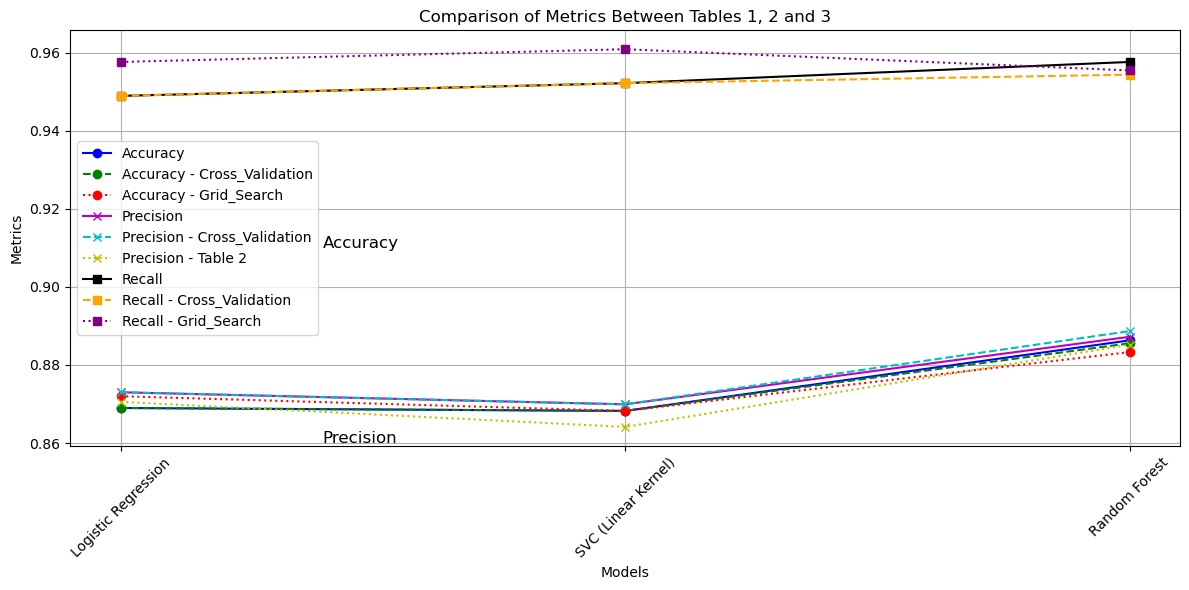

In [58]:
import matplotlib.pyplot as plt

# Dati delle due tabelle
models = ['Logistic Regression', 'SVC (Linear Kernel)', 'Random Forest']
accuracy_table1 = result_df['Accuracy'].tolist()
precision_table1 = result_df['Precision'].tolist()
recall_table1 = result_df['Recall'].tolist()

accuracy_table2 = result_df_cross['Accuracy'].tolist()
precision_table2 = result_df_cross['Precision'].tolist()
recall_table2 = result_df_cross['Recall'].tolist()

accuracy_table3 = result_df_grid['Accuracy'].tolist()
precision_table3 = result_df_grid['Precision'].tolist()
recall_table3 = result_df_grid['Recall'].tolist()

# Creazione del grafico a linee
plt.figure(figsize=(12, 6))

plt.plot(models, accuracy_table1, marker='o', label='Accuracy', color='b', linestyle='-')
plt.plot(models, accuracy_table2, marker='o', label='Accuracy - Cross_Validation', color='g', linestyle='--')
plt.plot(models, accuracy_table3, marker='o', label='Accuracy - Grid_Search', color='r', linestyle=':')

plt.plot(models, precision_table1, marker='x', label='Precision', color='m', linestyle='-')
plt.plot(models, precision_table2, marker='x', label='Precision - Cross_Validation', color='c', linestyle='--')
plt.plot(models, precision_table3, marker='x', label='Precision - Grid_Search', color='y', linestyle=':')

plt.plot(models, recall_table1, marker='s', label='Recall', color='k', linestyle='-')
plt.plot(models, recall_table2, marker='s', label='Recall - Cross_Validation', color='orange', linestyle='--')
plt.plot(models, recall_table3, marker='s', label='Recall - Grid_Search', color='purple', linestyle=':')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Comparison of Metrics Between Tables 1, 2 and 3')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Annotazioni
plt.annotate('Accuracy', xy=(0.4, 0.91), color='k', fontsize=12)
plt.annotate('Precision', xy=(0.4, 0.86), color='k', fontsize=12)
plt.annotate('Recall', xy=(0.4, 0.81), color='k', fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()

In [ ]:
#Conclusioni finali: il progetto è stato rappresentato effettuando le valutazioni su 3 modelli: LogisticRegression, SVC(linear Kernel), Random Forest.
#Le metriche considerate sono state:
# - Accuracy
# - Precision
# - Recall
#
#Il set di dati iniziale è stato inizialmente suddiviso in una parte di set di dati di training e una parte di set di dati di test.
#Per ogni modello considerato è stato addestrato il set di dati di training, sono state fatte le predizioni sul set di dati di test e calcolate le varie metriche
#inserite poi successivamente nel dataframe 'result_df'.
#La prima cosa che notiamo è che il modello che garanrisce dei risultati migliori è il Random Forest.
#-------------------------------------------------------------------------------------------------------------------------------------
#Successivamente si è utilizzato il metodo di CROSS-VALIDATION per avere una valutazione più corretta dei modelli, procedendo esattamente nel modo sopra indicato per ogni modello.
#Il dataframe utilizzato per salvare le varie metriche in questo caso è stato 'result_df_cross'.
#Quello che possiamo osservare è che il Random Forest rimane comunque il modello che garantisce risultati migliori.
#-------------------------------------------------------------------------------------------------------------------------------------
#Per ottimizzare al meglio i parametri e avere una valutazione ancora più precisa anche in questo caso per ogni modello abbiamo proceduto nella maniera sopra descritta.
#Il dataframe è 'result_df_grid'.
#-------------------------------------------------------------------------------------------------------------------------------------
#Concludendo, nel grafico, dove sono posti a confronto le metriche per ogni modello, possiamo concludere che:
#IL MODELLO PIU' PRECISO è il "RANDOM FOREST".
#I parametri migliori utilizzati per la miglior metrica 'accuracy' sono stati: {'max_depth': None, 'max_features': 0.1, 'n_estimators': 40}, calcolati attravreso l'operazione di GridSearchCV
#Questo perchè ha un buon equilibrio tra precisione e recall, con un'accuratezza complessivamente elevata. Inoltre, è importante notare che Random Forest potrebbe essere più robusto rispetto agli altri modelli, poiché il vantaggio nella precisione indica una maggiore capacità di evitare falsi positivi, che potrebbero essere costosi o indesiderati in un contesto educativo.
#Considerazioni singole:
#RECALL: Il recall misura la capacità di un modello di identificare correttamente gli studenti che hanno avuto successo (classe 1). Tutti e tre i modelli hanno recall elevati, ma il Random Forest 
#ha il recall leggermente più basso (0,955) rispetto agli altri due modelli (0,958 e 0,961 per Logistic Regression e SVC rispettivamente). Quindi, in termini di identificazione degli studenti di successo, Logistic Regression e SVC sembrano avere un vantaggio leggermente migliore.
#PRECISION: La precisione misura la capacità di un modello di classificare correttamente gli studenti identificati come di successo. Qui, Random Forest ha la precisione più alta (0,885), seguita da Logistic Regression (0,871) e SVC (0,864). Questo significa che Random Forest ha 
#una maggiore accuratezza nell'identificare gli studenti di successo quando li predice come tali.
#ACCURACY: L'accuratezza misura la capacità generale del modello di classificare correttamente entrambe le classi (abbandono e successo). Tutti e tre i modelli hanno buone accuratezze, ma Random Forest ha l'accuratezza più alta (0,883), seguito da Logistic Regression (0,872) e SVC (0,868).